- 활성화 함수와 경사하강법 성능을 비교해보자.
  1. sigmoid+SGD
  2. relu+SGD
  3. rely+Adam

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

### 데이터로딩

In [3]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [5]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
# 확률정보로 변경
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [7]:
display(y_train[:10])
display(y_train_one_hot[:10])

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

### 1.sigmoid+SGD

In [9]:
model1 = Sequential() # 뼈대
#입력층
model1.add(InputLayer(input_shape=(28,28)))
model1.add(Flatten()) #2차원 사진데이터를 1차원으로 평평하게 만듬
#중간층
model1.add(Dense(128,activation="sigmoid"))
model1.add(Dense(256,activation="sigmoid"))
model1.add(Dense(128,activation="sigmoid"))
#출력층
model1.add(Dense(10,activation="softmax"))

# 학습 및 평가방법 설정
model1.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])

In [11]:
# 조기학습중단
early = EarlyStopping(monitor="val_accuracy", patience=10)


his1 = model1.fit(X_train,
                  y_train_one_hot,
                  validation_split=0.2, #검증데이터 설정
                  callbacks=[early],
                  epochs=200)

Epoch 1/200
1500/1500 [==============================] - 8s 5ms/step - loss: 2.1070 - accuracy: 0.3605 - val_loss: 1.7680 - val_accuracy: 0.5208
Epoch 2/200
1500/1500 [==============================] - 6s 4ms/step - loss: 1.4300 - accuracy: 0.5623 - val_loss: 1.1908 - val_accuracy: 0.6510
Epoch 3/200
1500/1500 [==============================] - 6s 4ms/step - loss: 1.0669 - accuracy: 0.6400 - val_loss: 0.9620 - val_accuracy: 0.6744
Epoch 4/200
1500/1500 [==============================] - 6s 4ms/step - loss: 0.9001 - accuracy: 0.6793 - val_loss: 0.8399 - val_accuracy: 0.7039
Epoch 5/200
1500/1500 [==============================] - 5s 4ms/step - loss: 0.8070 - accuracy: 0.7105 - val_loss: 0.7725 - val_accuracy: 0.7261
Epoch 6/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.7409 - accuracy: 0.7317 - val_loss: 0.7251 - val_accuracy: 0.7412
Epoch 7/200
1500/1500 [==============================] - 5s 4ms/step - loss: 0.7109 - accuracy: 0.7499 - val_loss: 0.7058 - val_ac

### 2.relu+SGD

In [12]:
model2 = Sequential() # 뼈대
#입력층
model2.add(InputLayer(input_shape=(28,28)))
model2.add(Flatten()) #2차원 사진데이터를 1차원으로 평평하게 만듬
#중간층
model2.add(Dense(128,activation="relu"))
model2.add(Dense(256,activation="relu"))
model2.add(Dense(128,activation="relu"))
#출력층
model2.add(Dense(10,activation="softmax"))

# 학습 및 평가방법 설정
model2.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])

In [13]:
# 조기학습중단
early = EarlyStopping(monitor="val_accuracy", patience=10)


his2 = model2.fit(X_train,
                  y_train_one_hot,
                  validation_split=0.2, #검증데이터 설정
                  callbacks=[early],
                  epochs=200)

Epoch 1/200
1500/1500 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Epoch 2/200
1500/1500 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Epoch 3/200
1500/1500 [==============================] - 7s 5ms/step - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Epoch 4/200
1500/1500 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Epoch 5/200
1500/1500 [==============================] - 6s 4ms/step - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Epoch 6/200
1500/1500 [==============================] - 6s 4ms/step - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Epoch 7/200
1500/1500 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Epoch 8/200
1500/1500 [====

In [16]:
model3 = Sequential() # 뼈대
#입력층
model3.add(InputLayer(input_shape=(28,28)))
model3.add(Flatten()) #2차원 사진데이터를 1차원으로 평평하게 만듬
#중간층
model3.add(Dense(128,activation="relu"))
model3.add(Dense(256,activation="relu"))
model3.add(Dense(128,activation="relu"))
#출력층
model3.add(Dense(10,activation="softmax"))

# 학습 및 평가방법 설정
model3.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

In [17]:
# 조기학습중단
early = EarlyStopping(monitor="val_accuracy", patience=10)


his3 = model3.fit(X_train,
                  y_train_one_hot,
                  validation_split=0.2, #검증데이터 설정
                  callbacks=[early],
                  epochs=200)

Epoch 1/200
1500/1500 [==============================] - 10s 6ms/step - loss: 1.2969 - accuracy: 0.7364 - val_loss: 0.5551 - val_accuracy: 0.8014
Epoch 2/200
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5224 - accuracy: 0.8157 - val_loss: 0.5588 - val_accuracy: 0.8050
Epoch 3/200
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4551 - accuracy: 0.8358 - val_loss: 0.4575 - val_accuracy: 0.8307
Epoch 4/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4232 - accuracy: 0.8464 - val_loss: 0.4366 - val_accuracy: 0.8422
Epoch 5/200
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4027 - accuracy: 0.8562 - val_loss: 0.4108 - val_accuracy: 0.8567
Epoch 6/200
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3859 - accuracy: 0.8593 - val_loss: 0.4254 - val_accuracy: 0.8519
Epoch 7/200
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3794 - accuracy: 0.8621 - val_loss: 0.4109 - val_a

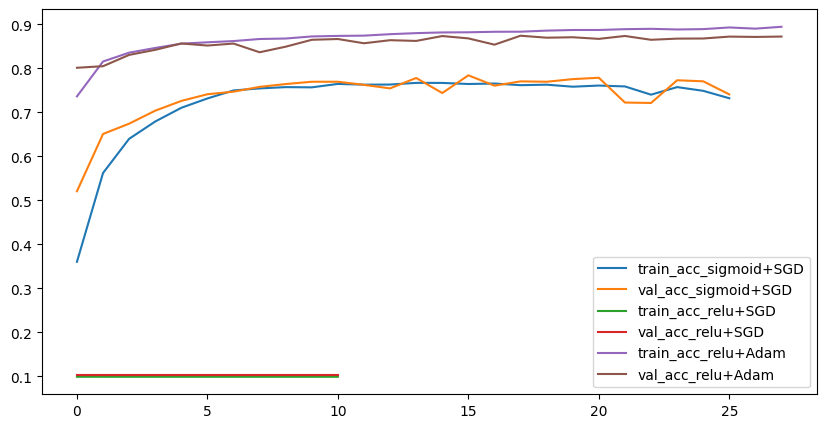

In [22]:
plt.figure(figsize=(10,5))
plt.plot(his1.history['accuracy'], label="train_acc_sigmoid+SGD")
plt.plot(his1.history['val_accuracy'], label="val_acc_sigmoid+SGD")
plt.plot(his2.history['accuracy'], label="train_acc_relu+SGD")
plt.plot(his2.history['val_accuracy'], label="val_acc_relu+SGD")
plt.plot(his3.history['accuracy'], label="train_acc_relu+Adam")
plt.plot(his3.history['val_accuracy'], label="val_acc_relu+Adam")
plt.legend()
plt.show()